In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [16]:
file_path = '../output/rerun/'
files = sorted(os.listdir(file_path))

cfg = get_config('../cfg/rerun_exp_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

orig = [0.0] * len(criticality_prob_list)
wo_drop = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [17]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_orig, core_wo_drop, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    orig[index] += core_orig
    wo_drop[index] += core_wo_drop
    ours[index] += core_ours

In [18]:
print(orig)
print(wo_drop)
print(ours)

[11.52, 11.34, 11.52, 11.36, 11.46, 11.46, 11.44, 11.74, 11.38, 11.28, 11.34]
[5.42, 12.9, 17.38, 20.42, 22.84, 23.1, 23.54, 21.82, 21.86, 17.8, 11.34]
[5.42, 5.7, 5.78, 5.86, 5.98, 6.28, 7.2, 8.26, 9.02, 10.12, 11.34]


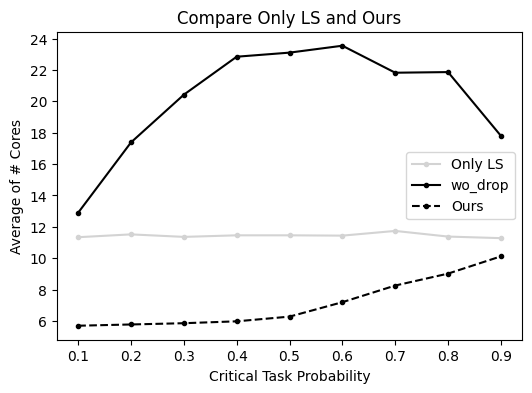

In [26]:
plt.figure(figsize=(6,4))

ax = plt.gca()

plt.plot(criticality_prob_list[1:-1], orig[1:-1], label='Only LS', color='lightgray', marker='.')
plt.plot(criticality_prob_list[1:-1], wo_drop[1:-1], label='wo_drop', color='black', marker='.')
plt.plot(criticality_prob_list[1:-1], ours[1:-1], label='Ours', color='black', linestyle='dashed', marker='.')

# # set y lim
# plt.ylim(3, 9)

plt.title('Compare Only LS and Ours')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of # Cores')
plt.legend()
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

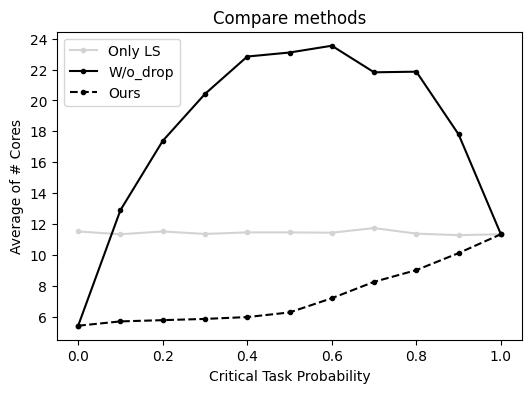

In [25]:
plt.figure(figsize=(6,4))

ax = plt.gca()

plt.plot(criticality_prob_list, orig, label='Only LS', color='lightgray', marker='.')
plt.plot(criticality_prob_list, wo_drop, label='W/o_drop', color='black', marker='.')
plt.plot(criticality_prob_list, ours, label='Ours', color='black', linestyle='dashed', marker='.')

plt.title('Compare methods')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of # Cores')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.legend()
plt.show()